# Libraries

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import auxlib

# Directories

In [2]:
saving_figs = os.path.join(os.getcwd(), 'figures')
if not os.path.exists(saving_figs):
	os.makedirs(saving_figs)

saving_files = os.path.join(os.getcwd(), 'media')
if not os.path.exists(saving_files):
	os.makedirs(saving_files)

# Analysis

## Subject 01 Run 03

In [3]:
data, signal_headers, header = auxlib.loadEEG(subject=1, record=3)
time = np.linspace(0, len(data[0])/160, len(data[0]))

In [ ]:
fig = auxlib.showEEG(data, 0, len(data[0]), time, header=header, electrodes=range(64))
fig.savefig(os.path.join(saving_figs, 'S001R03_all_channels.png'), dpi=300, bbox_inches='tight')

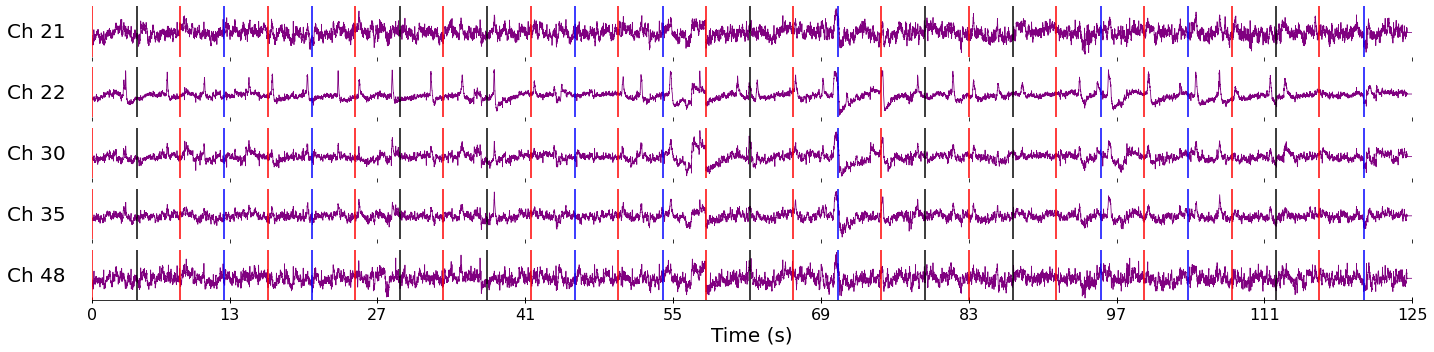

In [4]:
fig = auxlib.showEEG(data, 0, len(data[0]), time, header=header, electrodes=[20, 21, 29, 34, 47])
fig.savefig(os.path.join(saving_figs, 'S001R03_selected_channels.png'), dpi=300, bbox_inches='tight')

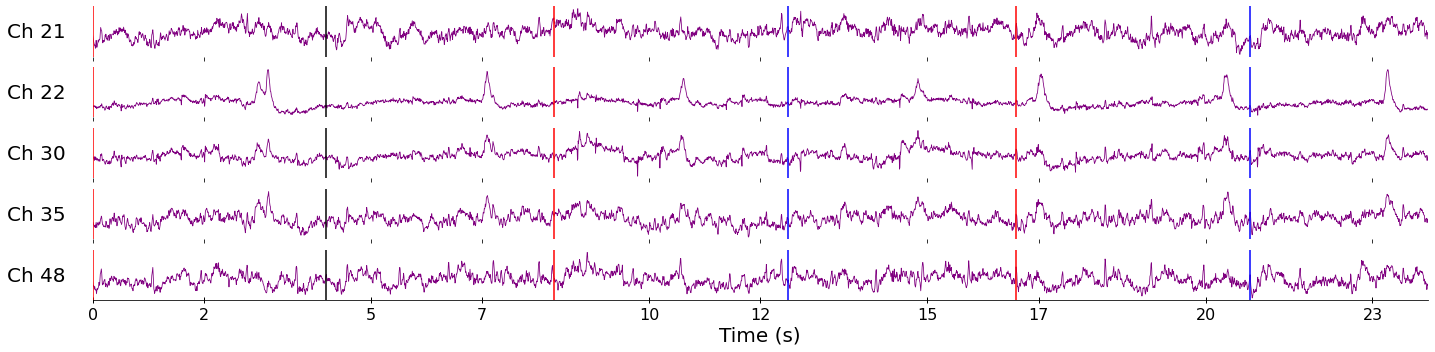

In [5]:
fig = auxlib.showEEG(data, 0, 1280*3, time, header=header, electrodes=[20, 21, 29, 34, 47])
fig.savefig(os.path.join(saving_figs, 'S001R03_segment_selected_channels.png'), dpi=300, bbox_inches='tight')

## Subject 10 Run 03

In [ ]:
data, signal_headers, header = auxlib.loadEEG(subject=10, record=3)
fig = auxlib.showEEG(data, 0, len(data[0]), time, header=header, electrodes=range(64))
fig.savefig(os.path.join(saving_figs, 'S010R03_all_channels.png'), dpi=300, bbox_inches='tight')

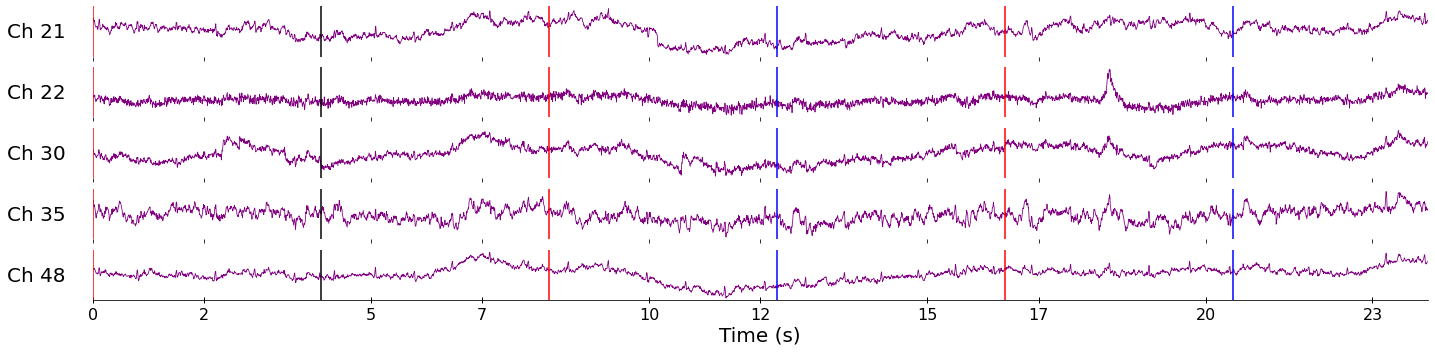

In [7]:
fig = auxlib.showEEG(data, 0, 1280*3, time, header=header, electrodes=[20, 21, 29, 34, 47])
fig.savefig(os.path.join(saving_figs, 'S010R03_segment_selected_channels.png'), dpi=300, bbox_inches='tight')

In [8]:

#fig2 = showEEG(data, 0, len(data[0]), time,[10, 31, 36, 42, 43, 48, 53, 63])
#fig2_zoom = showEEG(data, 0, 1280*3, time,[10, 31, 36, 42, 43, 48, 53, 63])

# Con filtros pasa banda

In [13]:
from scipy.signal import butter, filtfilt

def butter_bandpass(lowcut, highcut, fs, order=5):
    b, a = butter(order, [lowcut / (0.5*fs), highcut / (0.5*fs)], btype='band')
    return b, a

def bandpass_filter(data, lowcut=0.5, highcut=60.0, fs=160):
    b, a = butter_bandpass(lowcut, highcut, fs)
    return filtfilt(b, a, data)

In [ ]:
data, signal_headers, header = auxlib.loadEEG(subject=10, record=3)

data_filtered = [bandpass_filter(channel) for channel in data]
fig = auxlib.showEEG(data_filtered, 0, len(data_filtered[0]), time, header=header, electrodes=range(64))
fig.savefig(os.path.join(saving_figs, 'S010R03_filtered_all_channels.png'), dpi=300, bbox_inches='tight')

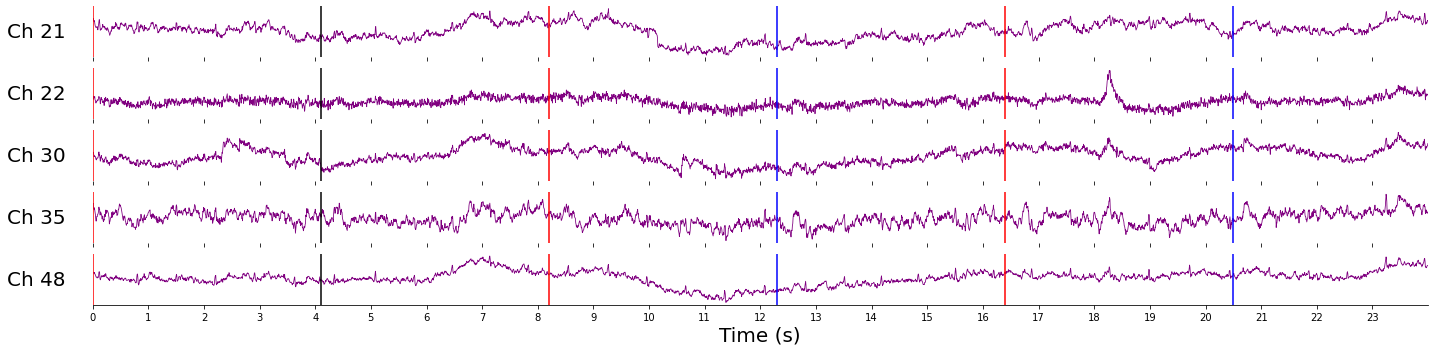

In [12]:
fig = auxlib.showEEG(data, 0, 1280*3, time, header=header, electrodes=[20, 21, 29, 34, 47])
fig.savefig(os.path.join(saving_figs, 'S010R03_filtered_segment_selected_channels.png'), dpi=300, bbox_inches='tight')

# Inspección de repeticiones